<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module4/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

Gradient Descent is an optimization algorithm used to minimize a function by iteratively updating model parameters. The goal is to find the parameters that minimize the **loss function**.

# **Basic types of Gradient Descent**

### 1. **Batch Gradient Descent (N-Sample)**
In **Batch Gradient Descent**, the model updates its parameters after computing the gradient over the **entire dataset**.

- **Update Rule:**
  $$
  \theta := \theta - \alpha \nabla J(\theta)
  $$

- **Pros:** Stable convergence.
- **Cons:** Slow for large datasets.

---

### 2. **Stochastic Gradient Descent (SGD)**
In **Stochastic Gradient Descent (SGD)**, the model updates its parameters **after each individual training example**.

- **Update Rule (for a single sample $ x^{(i)} $):**
  $$
  \theta := \theta - \alpha \nabla J(\theta, x^{(i)})
  $$

- **Pros:** Faster updates, works well for large datasets.
- **Cons:** Converges with noise, requires careful tuning of the learning rate.

---

### 3. **Mini-Batch Gradient Descent (M-Sample)**
**Mini-Batch Gradient Descent** is a compromise between **Batch GD** and **SGD**. It updates the parameters using a small batch of $ M $ samples.

- **Update Rule (for a batch $ B $ of size $ M $):**
  $$
  \theta := \theta - \alpha \nabla J(\theta, B)
  $$

- **Pros:** Faster than Batch GD, more stable than SGD.
- **Cons:** Still requires tuning of batch size $ M $.

---

## **Comparison Table**
| Type | Update Frequency | Convergence Stability | Computation Cost |
|------|----------------|----------------------|------------------|
| **Batch GD (N-Sample)** | After full dataset | Stable | High |
| **Stochastic GD (SGD)** | After each sample | Noisy | Low |
| **Mini-Batch GD (M-Sample)** | After small batch | Balanced | Moderate |


#Gradient Descent implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Load data

In [116]:
data = np.genfromtxt('./advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

Normalize the data

In [117]:
def mean_normalization(X):
  N = len (X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X - avg) / (maxi - mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b , maxi , mini , avg

In [118]:
X_b , maxi , mini , avg = mean_normalization ( X )

##Types of Gradient Descent

###Stochastic Gradient Descent

In [83]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, lr=0.00001):
    # thetas = np.random.randn(4, 1)  # Uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    N = X_b.shape[0]  # Number of samples

    for epoch in range(n_epochs):
        for i in range(N):
            # Select random index in N
            # random_index = np.random.randint(N)  # Use this in real application
            random_index = i  # This is used for the assignment

            xi = X_b[random_index:random_index+1]  # Select one sample
            yi = y[random_index:random_index+1]  # Corresponding target value

            # Compute output (prediction)
            y_pred = np.dot(xi, thetas)

            # Compute loss (Squared Error Loss)
            loss = (y_pred - yi)*(y_pred - yi)/2

            # Compute gradient for loss
            gradient = xi.T.dot(y_pred - yi)  # Gradient of MSE loss

            # Update theta
            thetas = thetas - lr * gradient  # Apply gradient update

            # Logging
            thetas_path.append(thetas)
            losses.append(loss[0][0])  # Store loss

    return thetas_path, losses

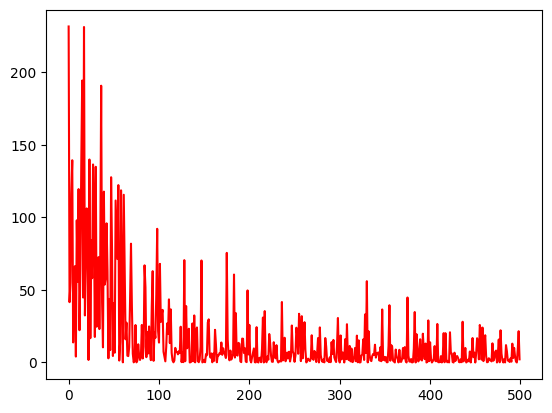

In [114]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =50 ,
                                                  lr =0.01 )

x_axis = list(range(500))
plt.plot(x_axis , losses [:500] , color ="r")
plt.show()

In [85]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y ,
                                                  n_epochs =1 ,
                                                  lr= 0.01 )
print ( np .sum( losses ) )

6754.643359356192


###Mini-batch Gradient Descent

In [120]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])


        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # tính output
            output = xi.dot(thetas)

            # tính loss
            loss = ((output - yi)**2)/2

            # tính đạo hàm cho loss
            loss_grd = (output - yi)/minibatch_size

            # tính đạo hàm cho các tham số
            gradients = xi.T.dot(loss_grd)

            # cập nhật tham số
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

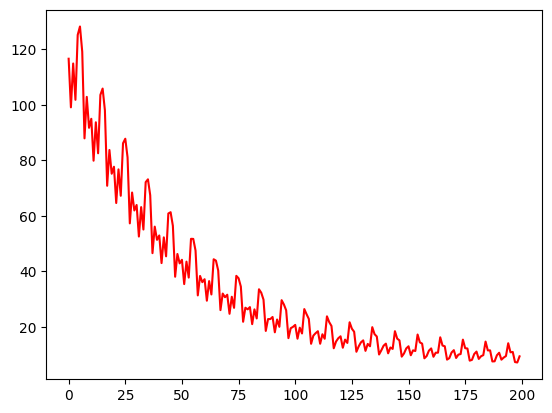

In [121]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
                                                    minibatch_size = 20 ,
                                                     learning_rate =0.01)

x_axis = list ( range (200) )
plt.plot ( x_axis , losses [:200] , color ="r")
plt.show ()

In [122]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses),2))

8865.65


###Batch Gradient Descent

In [127]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
      #Compute output
      y_pred = X_b.dot(thetas)

      #Compute loss
      loss = (y_pred - y)*(y_pred - y)
      loss_grad = 2*(y_pred - y)/N

      #Compute gradient
      gradient = X_b.T.dot(loss_grad)

      #Update theta
      thetas = thetas - learning_rate * gradient

      #Logging
      thetas_path.append(thetas)
      losses.append(np.sum(loss)/N)

    return thetas_path, losses

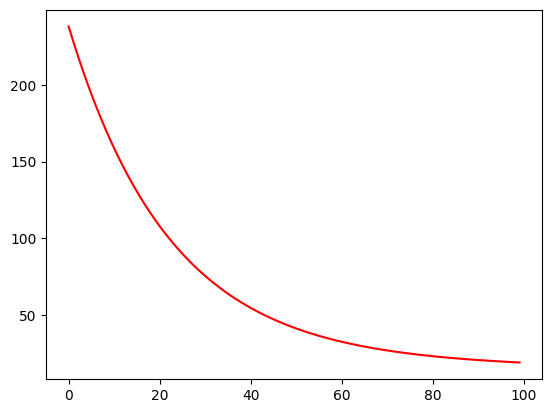

In [128]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [129]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses),2))

6716.46


#Apply Gradient Descent for Bitcoin forcasting

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##Data

###Load data

In [131]:
df = pd.read_csv('./BTC-Daily.csv')

df = df.drop_duplicates ()

df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


###Visualize data

In [132]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print ( date_range )

2014-11-28 to 2022-03-01


In [135]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

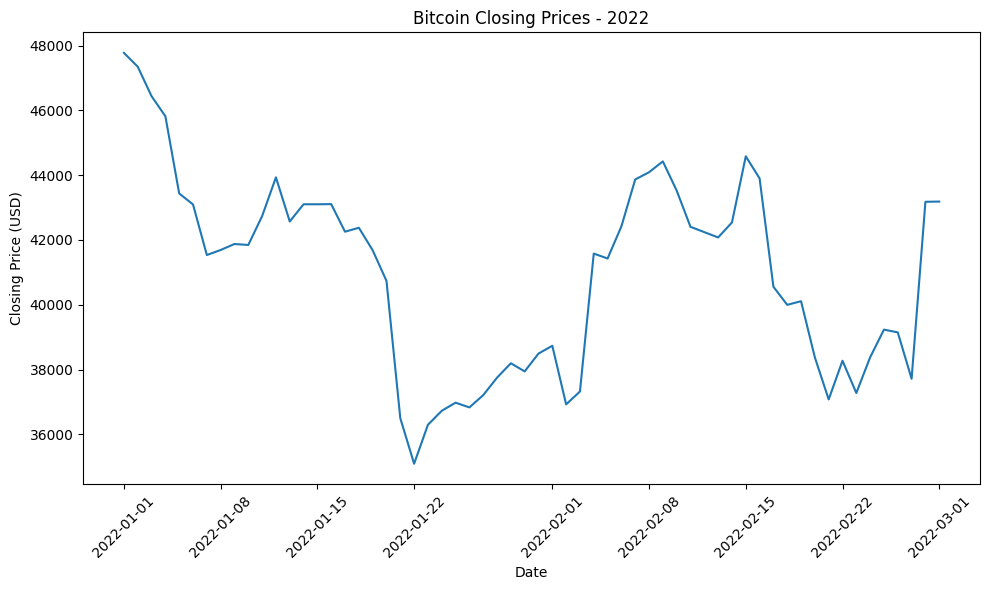

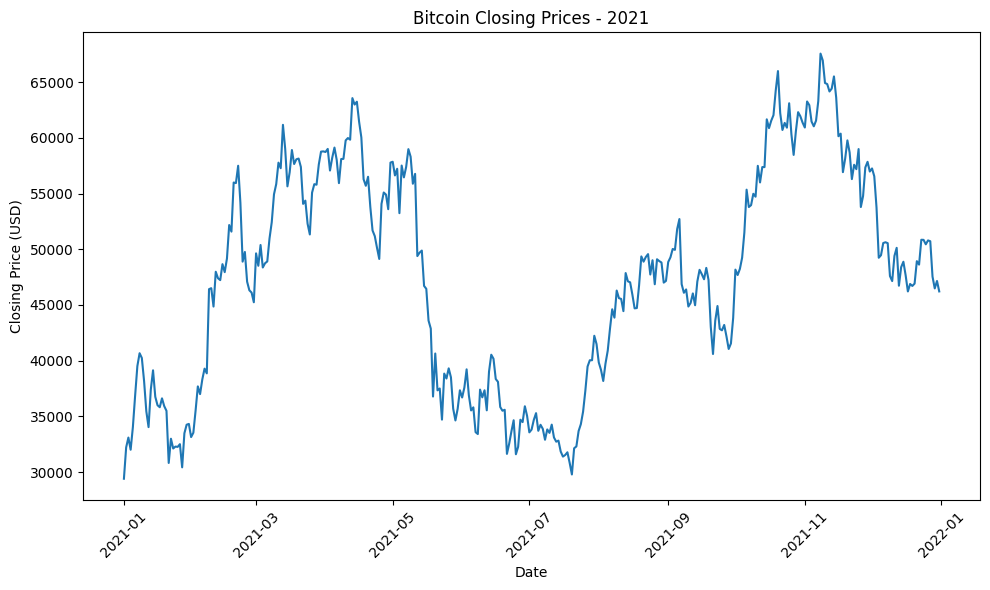

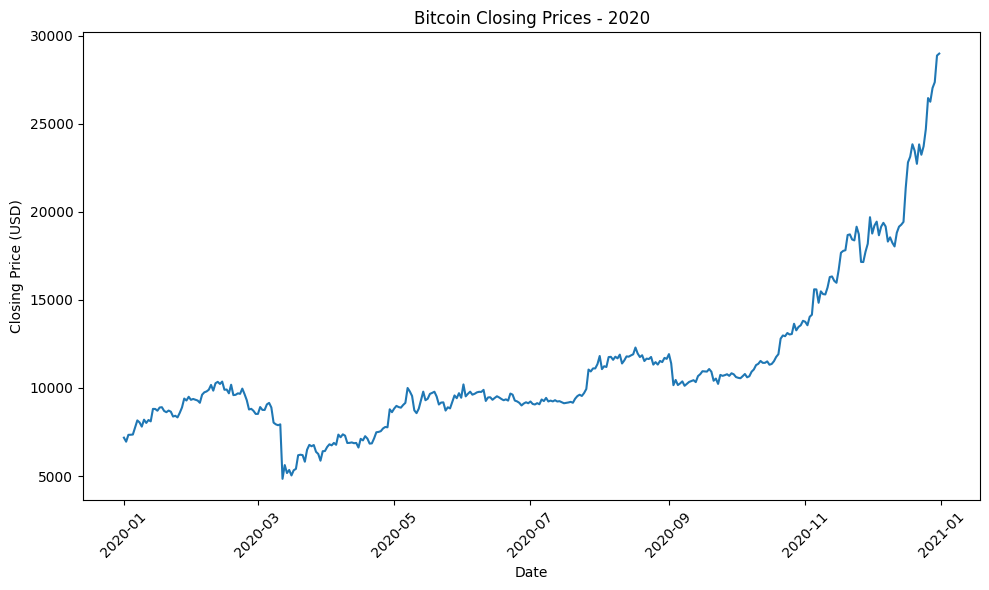

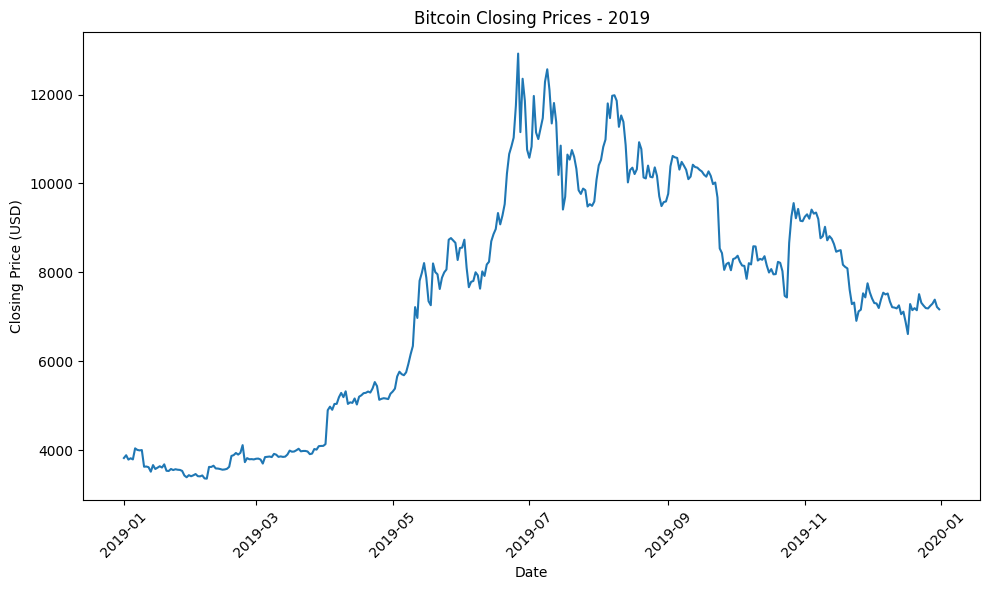

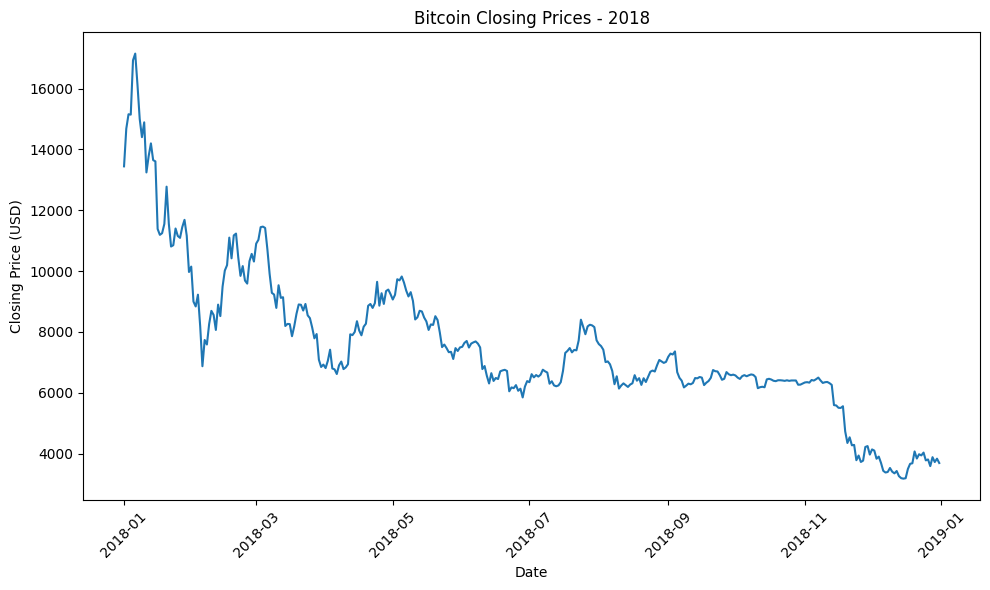

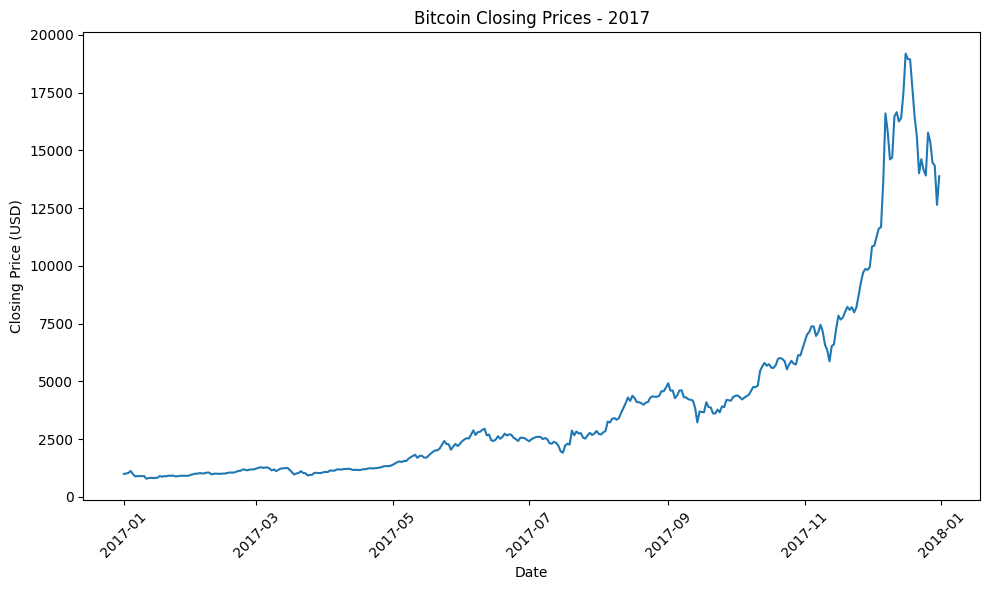

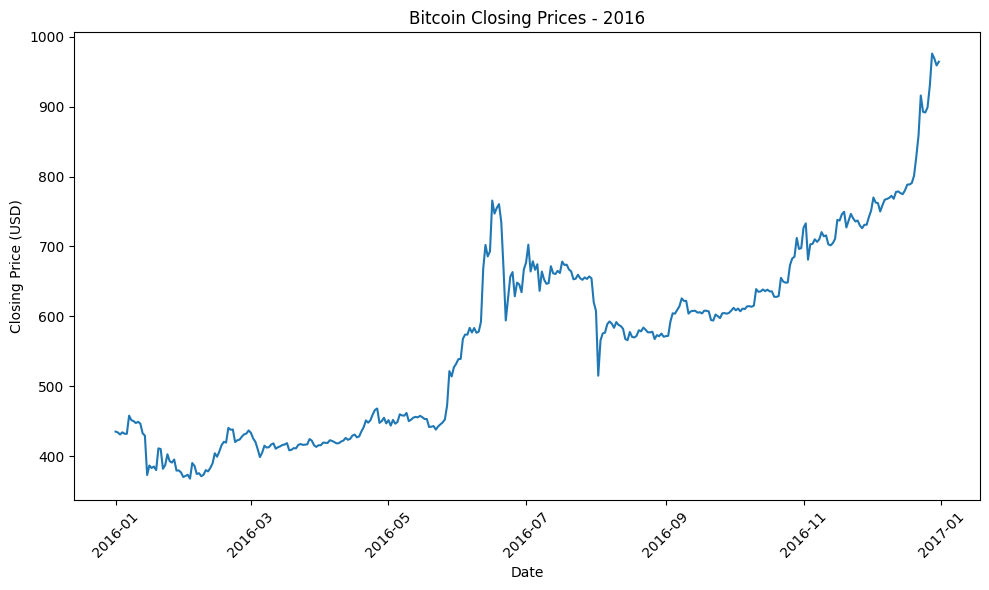

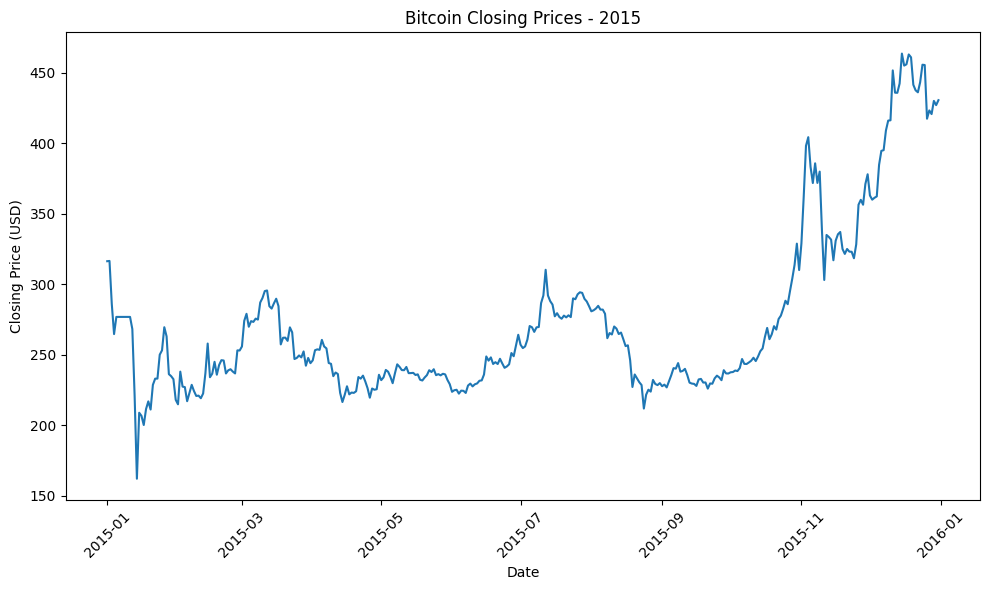

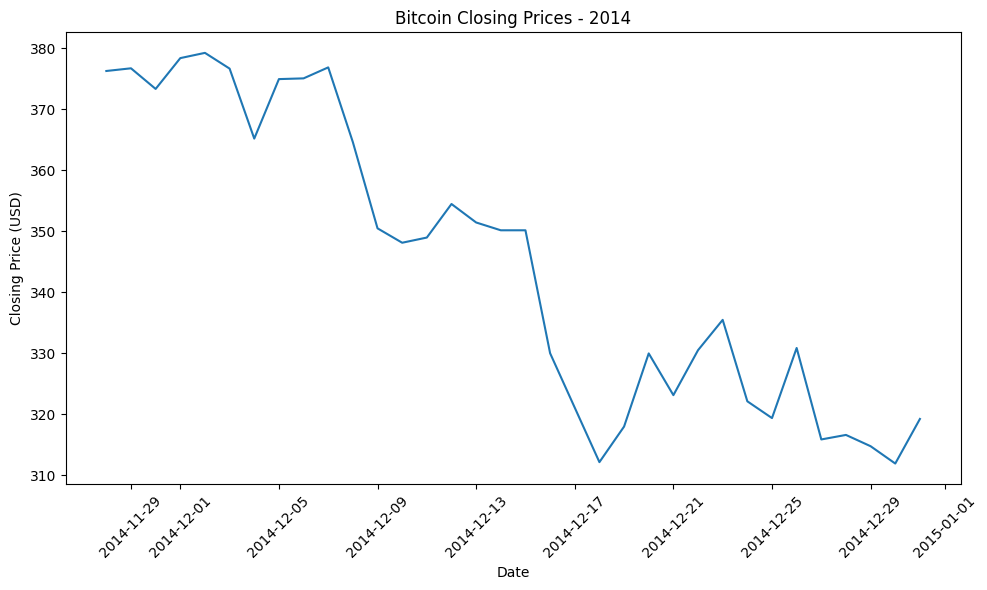

In [143]:
unique_years = df['year'].unique()

for year in unique_years:
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day

    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize = (10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - { year }')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

Use mplfinance to visualize

In [144]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [145]:
import matplotlib . dates as mdates
from mplfinance . original_flavor import candlestick_ohlc
import datetime

<ipython-input-146-dcc2a3cebb4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


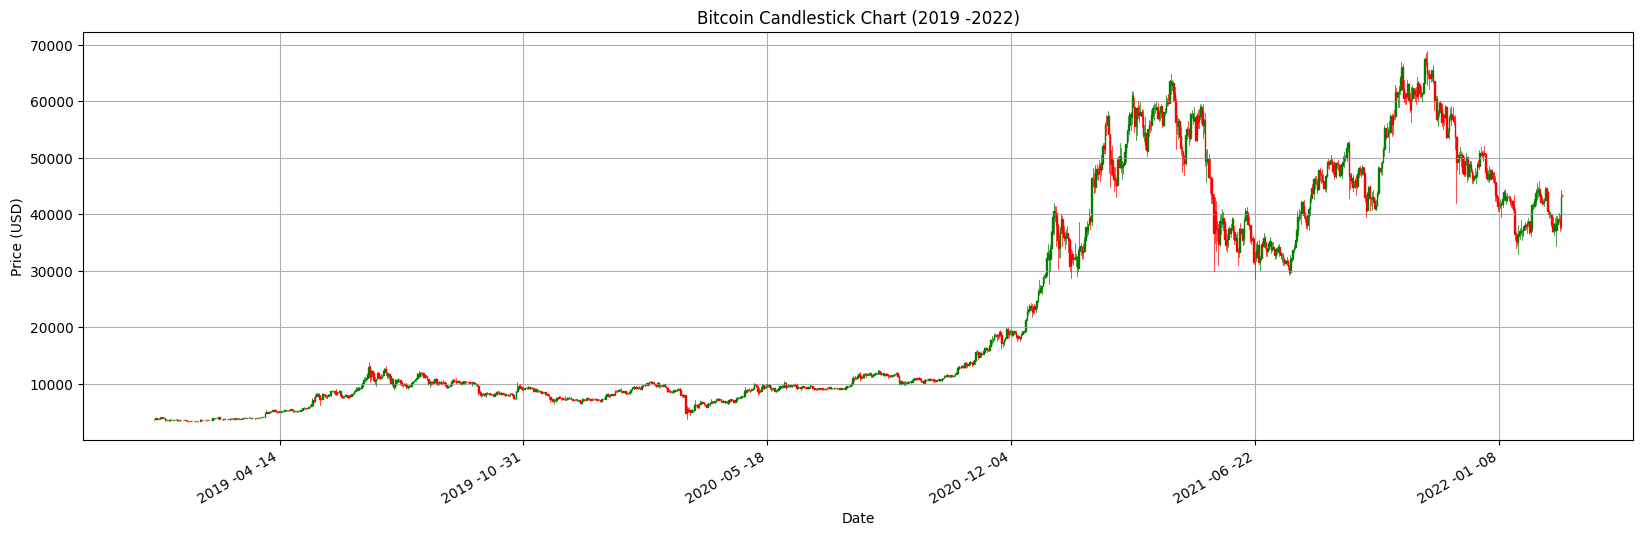

In [146]:
# Filter data for 2019 -2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize = (20 , 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width =0.6 , colorup ='g', colordown ='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y -%m -%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019 -2022)')
plt.xlabel ('Date')
plt.ylabel ('Price (USD)')
plt.grid (True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022 .pdf')

plt.show ()

###Split data

In [161]:
scalar = StandardScaler()
df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

In [162]:
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle = True)

##Model

In [155]:
def predict(X, w, b):
  return X.dot(w) + b

def gradient(y_hat, y, x):
  loss = y_hat-y
  dw = x.T.dot(loss)/len(y)
  db = np.sum(loss)/len(y)
  cost = np.sum(loss**2)/(2*len(y))
  return (dw, db, cost)

def update_weight(w,b,lr,dw,db):
  w_new = w - lr*dw
  b_new = b - lr*db
  return (w_new, b_new)


In [150]:
def linear_regression_vectorized(X , y , learning_rate =0.01 , num_iterations =200):
  n_samples , n_features = X . shape
  w = np . zeros ( n_features ) # Initialize weights
  b = 0 # Initialize bias
  losses = []

  for _ in range(num_iterations):
    y_hat = predict(X, w, b)  # Make predictions
    dw, db, cost = gradient(y_hat, y, X)  # Calculate gradients
    w, b = update_weight(w, b, learning_rate, dw, db)  # Update weights and bias
    losses.append(cost)

  return w, b, losses

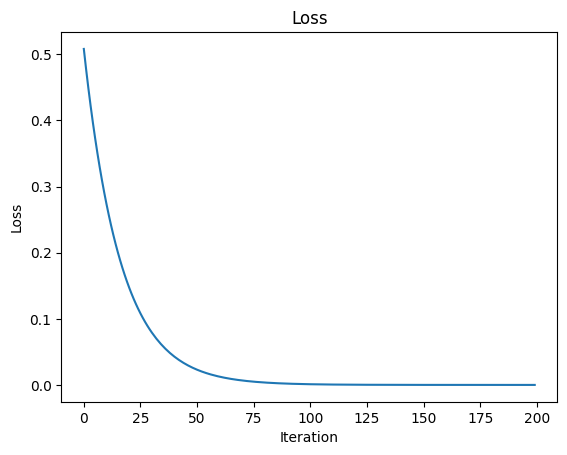

In [163]:
w , b , losses = linear_regression_vectorized(X_train.values, y_train.values,
                                              learning_rate = 0.01,
                                              num_iterations =200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [164]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


<ipython-input-165-75bae4b932f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)


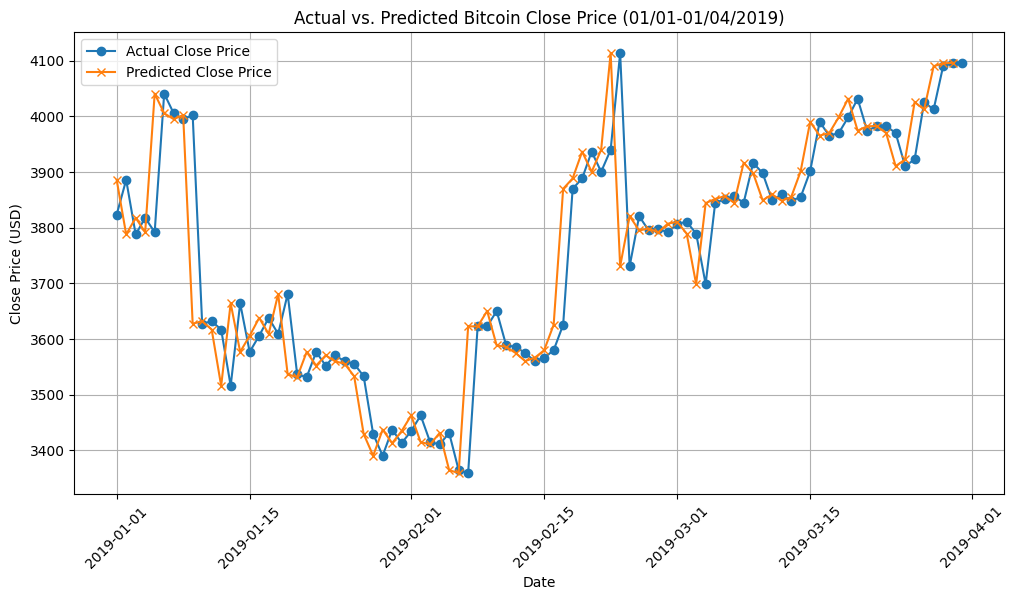

In [165]:
# Filter data for 2019-01-01 to 2019-03-31
df_2019_Q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]

# Assuming you have a way to predict the close prices for 2019-01-01 to 2019-03-31 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_Q1['date'], df_2019_Q1['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_Q1['date'], df_2019_Q1['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01-01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
